In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import torch
sys.path.append("../../")
from TCN.soil_classification.model import SimpleVAE
from TCN.soil_classification.utils import data_generator, data_generator_test
from TCN.soil_classification.model_AE import TCNAE, ConvAE, DenseTCNAE, ConvTCNAE, DenseLastTCNAE, DenseAE

from sklearn.manifold import TSNE

In [2]:
# Definitions for data indicies
LIN_ACC_X = 1
LIN_ACC_Y = 2
LIN_ACC_Z = 3
ANG_VEL_X = 4
ANG_VEL_Y = 5
ANG_VEL_Z = 6
ORIENT_X = 7
ORIENT_Y = 8
ORIENT_Z = 9
ORIENT_W = 10
POS_X = 11
POS_Z = 12
ANG = 13
BOOM = 14
DIPPER = 15
TELE = 16
PITCH = 17
labels = ["lin_acc_x","lin_acc_y","lin_acc_z","ang_vel_x","ang_vel_y","ang_vel_z", "ori_x", "ori_y",
          "ori_z", "ori_w", "pos_x", "pos_z", "ang", "boom", "dipper", "tele", "pitch"]

In [18]:
DenseAE_small = "AE_model/DenseAE_bs256_do0_seq128_imu_no_orient+torques_phase2_nlf8/DenseAE_bs256_do0_seq128_imu_no_orient+torques_phase2_nlf8_ep64.pt"
DenseAE_large = "AE_model/DenseAE_bs256_do0_seq128_imu_no_orient+torques_phase2_nlf240/DenseAE_bs256_do0_seq128_imu_no_orient+torques_phase2_nlf240_ep64.pt"
DenseAE_largeL1 = "AE_model/DenseAEL1_bs256_do0_seq128_imu_no_orient+torques_phase2_nlf240/DenseAEL1_bs256_do0_seq128_imu_no_orient+torques_phase2_nlf240_ep64.pt"
DenseAE_smallL1 = "AE_model/DenseAEL1_bs256_do0_seq128_imu_no_orient+torques_phase2_nlf8/DenseAEL1_bs256_do0_seq128_imu_no_orient+torques_phase2_nlf8_ep57.pt"
ConvAE_8 = "AE_model/ConvAE_bs256_do0_seq128_imu_no_orient+torques_phase2_nlf8/ConvAE_bs256_do0_seq128_imu_no_orient+torques_phase2_nlf8_ep64.pt"
ConvAE_small = "AE_model/ConvAE_bs256_do0_seq128_imu_no_orient+torques_phase2_nlf5/ConvAE_bs256_do0_seq128_imu_no_orient+torques_phase2_nlf5_ep64.pt"
ConvAE_large = "AE_model/ConvAE_bs256_do0_seq128_imu_no_orient+torques_phase2_nlf240/ConvAE_bs256_do0_seq128_imu_no_orient+torques_phase2_nlf240_ep64.pt"

ConvAED_8 = "AE_model/ConvAED_bs256_do0_seq128_imu_no_orient+torques_phase2_nlf8/ConvAED_bs256_do0_seq128_imu_no_orient+torques_phase2_nlf8_ep15.pt"


train_folder = "/home/mads/git/TCN/TCN/soil_classification/data/exp_1604/train"
test_folder = "/home/mads/git/TCN/TCN/soil_classification/data/exp_1604/test"

variable_set = [list(range(LIN_ACC_X,ANG_VEL_Z+1,1))+list(range(BOOM,PITCH+1,1))]
seq_len = 128
phase = 2

X_train, Y_train = data_generator(train_folder, seq_len, seq_len-1, phase =phase, val_mask=variable_set[0])
X_test, Y_test, plotting, files = data_generator_test(test_folder, seq_len, seq_len-1, phase =phase, val_mask=variable_set[0])

m = X_train.mean(0, keepdim=True)
s = X_train.std(0, unbiased=False, keepdim=True)

X_train -= m
X_train /= s
X_train = X_train.permute(0,2,1)

for traj_idx in range(len(X_test)):
    X_test[traj_idx] -= m
    X_test[traj_idx] /= s
    X_test[traj_idx] = X_test[traj_idx].permute(0,2,1)

channel_sizes = [30,30,30,30,30,4]#[30]*4 #[30,20,10,1]#
kernel_size = 7
input_channels = X_train.shape[1]
latent_dim = 8

hidden_dims = [1000,800,500, 200,160, 80]

#model = DenseTCNAE(input_channels, latent_dim, seq_len, channel_sizes, kernel_size=kernel_size, dropout = 0.25)


#model = ConvTCNAE(input_channels, 10, channel_sizes, kernel_size=kernel_size, dropout = 0.25)

#model = DenseAE(input_channels, seq_len, latent_dim, hidden_dims)
#model.load_state_dict(torch.load(DenseAE_small))
#model.load_state_dict(torch.load(DenseAE_largeL1))
#model.load_state_dict(torch.load(DenseAE_smallL1))


model = ConvAE(input_channels, channel_sizes, kernel_size)
model.load_state_dict(torch.load(ConvAED_8))

model.eval()

ConvAE(
  (encoder): Sequential(
    (0): Sequential(
      (0): Conv1d(10, 30, kernel_size=(7,), stride=(2,), padding=(3,))
      (1): ReLU()
    )
    (1): Sequential(
      (0): Conv1d(30, 30, kernel_size=(7,), stride=(2,), padding=(3,))
      (1): ReLU()
    )
    (2): Sequential(
      (0): Conv1d(30, 30, kernel_size=(7,), stride=(2,), padding=(3,))
      (1): ReLU()
    )
    (3): Sequential(
      (0): Conv1d(30, 30, kernel_size=(7,), stride=(2,), padding=(3,))
      (1): ReLU()
    )
    (4): Sequential(
      (0): Conv1d(30, 30, kernel_size=(7,), stride=(2,), padding=(3,))
      (1): ReLU()
    )
    (5): Sequential(
      (0): Conv1d(30, 4, kernel_size=(7,), stride=(2,), padding=(3,))
      (1): ReLU()
    )
  )
  (decoder): Sequential(
    (0): Sequential(
      (0): ConvTranspose1d(4, 30, kernel_size=(7,), stride=(2,), padding=(3,), output_padding=(1,))
      (1): ReLU()
    )
    (1): Sequential(
      (0): ConvTranspose1d(30, 30, kernel_size=(7,), stride=(2,), padding=(3,

In [19]:
with torch.no_grad():
    model.eval()
    output = []
    for x in X_test:
        output.append(model(x))

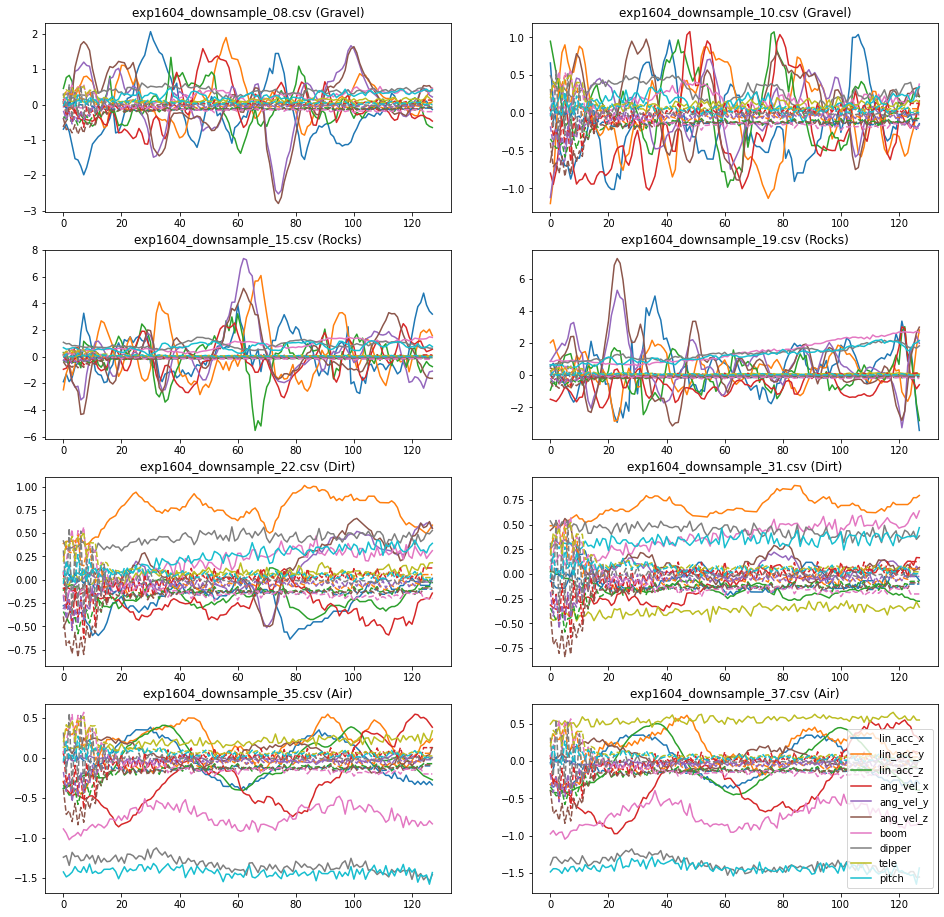

In [20]:
idx = 250
soil_class = ["Gravel","Gravel","Rocks","Rocks","Dirt","Dirt","Air","Air"]
legend = [labels[i-1] for i in variable_set[0]]
rows = int((len(plotting)+1)/2) 
fig, ax1 = plt.subplots(rows,2,figsize = [16,4*rows])
plt.gca().set_prop_cycle(None)
for a1,d,f,out,s in zip(ax1.reshape(-1),plotting,files,output,soil_class):
    a1.title.set_text(f+f" ({s})")
    a1.plot(out[1][idx].T)   
    plt.gca().set_prop_cycle(None)
    a1.plot(out[0][idx].T,linestyle="--")
plt.legend(legend)
plt.show()

## t-SNE Test Set

In [21]:
colors = ["r", "g", "b", "c"]

x_te = torch.cat(X_test)
y_te = torch.cat(Y_test)

with torch.no_grad():
    model.eval()
    encoded_test = model.encode(x_te)
    encoded_train = model.encode(X_train)

test_len = encoded_test.shape[0]
encoded = torch.cat((encoded_test,encoded_train))
    
projected = TSNE(n_components=2).fit_transform(torch.flatten(encoded, start_dim=1))

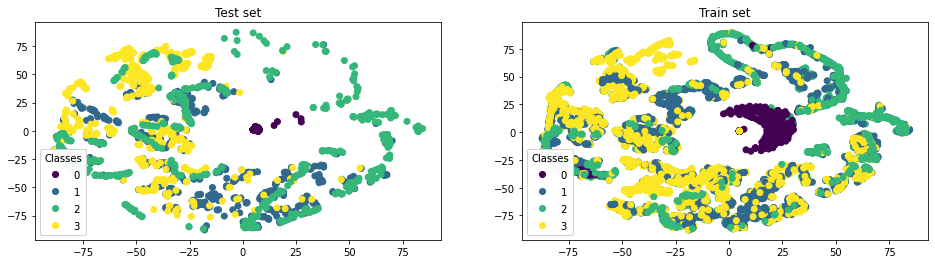

In [22]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize = [16,4])
scatter = ax1.scatter(projected[:test_len,0],projected[:test_len,1], c= y_te)

legend1 = ax1.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax1.add_artist(legend1)
ax1.title.set_text("Test set")

scatter = ax2.scatter(projected[test_len:,0],projected[test_len:,1], c= Y_train)

legend1 = ax2.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax2.add_artist(legend1)
ax2.title.set_text("Train set")

plt.show()

## Train set

In [15]:
with torch.no_grad():
    out = model(X_train)

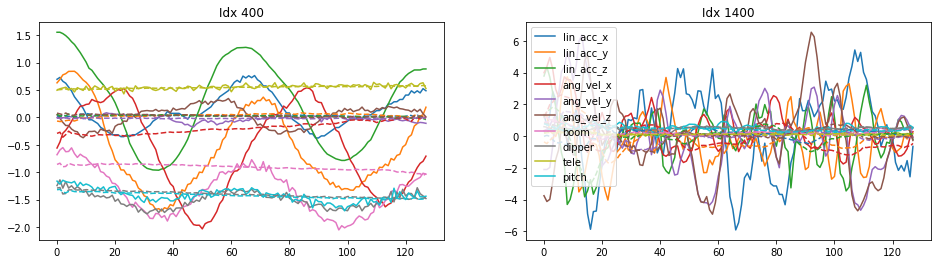

In [16]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize = [16,4])
plt.gca().set_prop_cycle(None)
ax1.plot(out[1][400].T)
plt.gca().set_prop_cycle(None)
ax1.plot(out[0][400].T, linestyle="--")
ax1.title.set_text("Idx 400")

plt.gca().set_prop_cycle(None)
ax2.plot(out[1][1400].T)
plt.gca().set_prop_cycle(None)
ax2.plot(out[0][1400].T, linestyle="--")
ax2.title.set_text("Idx 1400")
plt.legend(legend)
plt.show()

In [17]:
projected = TSNE(n_components=2).fit_transform(torch.flatten(out[2], start_dim=1))

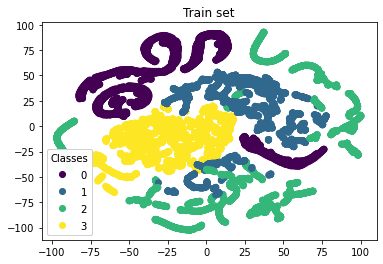

In [11]:
fig, ax = plt.subplots()
scatter = ax.scatter(projected[:,0],projected[:,1], c= Y_train)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)
ax.title.set_text("Train set")
plt.show()